Checked 12/8 NL

In [ ]:
from google.colab import drive
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import statistics as stats
import numpy as np
import pandas as pd
import os

In [ ]:
# Mounting the drive
drive.mount('/content/drive')
data_dir = "/content/drive/MyDrive/deCola/SND Lab/Data/node_and_box_dimension_data_as_csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Deriving an Experssion for $v_a$ and $v_h$ the Speed of Sound in Air and Helium Respectively
It is known that the wave length of a standing wave is $$\lambda =\frac{2\pi}{k}$$ where in 3-space that becomes $$\lambda =\frac{2\pi}{\sqrt{k_x^2+k_y^2+k_z^2}}$$ where the wave numbers $$k_i =\frac{n_i\pi}{L_i}\ \ \ \ \ \ \ \ i=x,y,z$$where $n_i$ is the number of displacement anti-nodes in a directions and $L_i$ is the length of the box in that direction, or the length the wave will travel. Combining these we get $$\lambda =\frac{2\pi}{\sqrt{\left(\frac{n_x\pi}{L_x}\right)^2+\left(\frac{n_y\pi}{L_y}\right)^2+\left(\frac{n_z\pi}{L_z}\right)^2}}$$ $$\lambda =\frac{2}{\sqrt{\left(\frac{n_x}{L_x}\right)^2+\left(\frac{n_y}{L_y}\right)^2+\left(\frac{n_z}{L_z}\right)^2}}$$
As the velocity of a wave is $v=f\lambda$ where $f$ is the frequency of the wave. Therefore the velocity of the wave is $$v =\frac{2f}{\sqrt{\left(\frac{n_x}{L_x}\right)^2+\left(\frac{n_y}{L_y}\right)^2+\left(\frac{n_z}{L_z}\right)^2}}$$ This equation applies for both the speed of sound in air and Helium. 

## Deriving Error in $v_a$ and $v_h$ using Error Propogation
We can caluclate an uncertainty in G using error propogation:
\begin{align}
\sigma_v&=\sqrt{\sum_i\left(\frac{\partial v}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&=\sqrt{\left(\frac{2}{\sqrt{\left(\frac{n_x}{L_x}\right)^2+\left(\frac{n_y}{L_y}\right)^2+\left(\frac{n_z}{L_z}\right)^2}}\sigma_f\right)^2 + \left(\frac{f}{\left(\left(\frac{n_x}{L_x}\right)^2+\left(\frac{n_y}{L_y}\right)^2+\left(\frac{n_z}{L_z}\right)^2\right)^{\frac{3}{2}}}\frac{2n_x^2}{L_x^3}\sigma_{L_x}\right)^2 + \left(\frac{f}{\left(\left(\frac{n_x}{L_x}\right)^2+\left(\frac{n_y}{L_y}\right)^2+\left(\frac{n_z}{L_z}\right)^2\right)^{\frac{3}{2}}}\frac{2n_y^2}{L_y^3}\sigma_{L_y}\right)^2 + \left(\frac{f}{\left(\left(\frac{n_x}{L_x}\right)^2+\left(\frac{n_y}{L_y}\right)^2+\left(\frac{n_z}{L_z}\right)^2\right)^{\frac{3}{2}}}\frac{2n_z^2}{L_z^3}\sigma_{L_z}\right)^2}
\end{align}

# Calculating the Speed of Sound in Air


In [ ]:
# Getting the data
box_dim_df = pd.read_csv(os.path.join(data_dir, "box_dimensions.csv"))
air_nodes_df = pd.read_csv(os.path.join(data_dir, "air_node_data.csv"))

# Merging the data sets on the box number so that each node data also has the corresponding dimensions
data = pd.merge(air_nodes_df, box_dim_df, on="Box")

# Creating numpy arrays for each of the columns so that we can preform operations with them
freq = data.iloc[:,1].values
n_x = data.iloc[:,2].values
n_y = data.iloc[:,3].values
L_x = data.iloc[:,4].values * 10**-3 # converting to meters
L_y = data.iloc[:,5].values * 10**-3 # converting to meters
L_z = data.iloc[:,6].values * 10**-3 # converting to meters

trail = np.asarray([i for i in range(len(n_x))])



First we will assume that all the $n_z$ are 0 as there are clearly some cases where this was true. We will then increase $n_z$ by 1 for the values not around the cluster of values formed when $n_z=0$ as these values must be around the true value as there was certainty some cases where $n_z=0$, which is verified by Boxes 4 and 5 as they had the same dimensions and we measured their standing waves at the same frequencies, some of which had no pressure nodes in one of the boxes corresponding z direction. 

[343.332      343.68924786 343.808      347.628      345.20266311
 346.04       585.344      339.372               inf 344.21919361
 345.876      344.74832174 346.72       347.17658576 344.148
 345.906      346.00096595 344.1030326  347.14       346.8
 339.72624285 345.814      345.81077387 344.745     ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


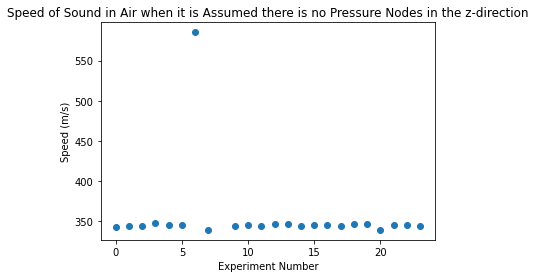

In [ ]:
n_z = [0 for i in range(len(n_y))]

v_a = 2*freq / ( np.sqrt((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2) )
print(v_a)

plt.scatter(trail, v_a)
plt.title("Speed of Sound in Air when it is Assumed there is no Pressure Nodes in the z-direction")
plt.xlabel("Experiment Number")
plt.ylabel("Speed (m/s)")
plt.show()

It is clear that for this assumption does not work for all trails. Specifically we get one extremely high value and one value that does not exist as we assumed there was no pressure antinodes in any direction. As these values for the speed of sound in air are clearly clustering around $340 \frac{m}{s}$. We will increase $n_z$ to 1 for any calculated speed of sound values in air not between 300 and 350 meters per second. 

[343.332      343.68924786 343.808      347.628      345.20266311
 346.04       346.75219584 339.372      346.8        344.21919361
 345.876      344.74832174 346.72       347.17658576 344.148
 345.906      346.00096595 344.1030326  347.14       346.8
 339.72624285 345.814      345.81077387 344.745     ]


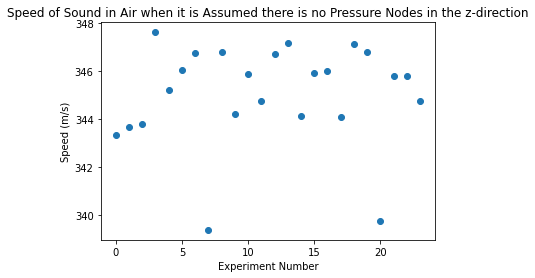

In [ ]:
# Correcting the n_z values
for i in range(len(v_a)):
  if v_a[i] > 350 or v_a[i]<300:
    n_z[i] += 1

# Recalculating values for speed of sound in air
v_a = 2*freq / ( np.sqrt((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2) )
print(v_a)

plt.scatter(trail, v_a)
plt.title("Speed of Sound in Air when it is Assumed there is no Pressure Nodes in the z-direction")
plt.xlabel("Experiment Number")
plt.ylabel("Speed (m/s)")
plt.show()

### Solving for the Error in $v_a$, the Speed of Sound in Air

In [ ]:
n_z = np.asarray(n_z)
freq_unc = np.asarray([9 for i in range(len(n_x))])
L_x_unc = np.asarray([0.001 for i in range(len(n_x))]) # in meters
L_y_unc = np.asarray([0.001 for i in range(len(n_x))]) # in meters
L_z_unc = np.asarray([0.001 for i in range(len(n_x))]) # in meters

v_a_unc = np.sqrt( (2/(np.sqrt((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2))*freq_unc)**2 + 
                   (freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_x**2/L_x**3 * L_x_unc)**2 + 
                   (freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_y**2/L_y**3 * L_y_unc)**2 +
                   (freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_z**2/L_z**3 * L_z_unc)**2 )

### Checking for Outliers
From the graph it appears the two lower values may be outliers. We will check using Cauvenet's Criterion. For a sample size of 24 Chauvenet's Criterion Table says any value with a z-score of more than 2.33 would be an outlier. 

In [ ]:
v_a_mean = stats.mean(v_a)
v_a_std = stats.stdev(v_a)
z_score = (v_a - v_a_mean) / v_a_std
print(z_score)

[-0.82556823 -0.65537488 -0.5988012   1.22105187  0.06561816  0.46452656
  0.80381761 -2.71211749  0.82659157 -0.40290801  0.38639675 -0.15083067
  0.78847947  1.00599753 -0.43682475  0.40068879  0.44593069 -0.45824728
  0.98856802  0.82659157 -2.54335572  0.35685986  0.35532293 -0.15241315]


It is clear that two of these values are outlier according to Chauvenet's Criterion and we will remove them. Explaining these outliers is discussed in the Conclusion Section. 

In [ ]:
# Removing outliers
if not len(v_a) ==22:
  j=0 # Allows us to have the right index as we delete trails
  for i in range(len(v_a)):
   if not -2.33 < z_score[i] < 2.33:
    v_a = np.delete(v_a, j)
    v_a_unc = np.delete(v_a_unc, j)
    freq = np.delete(freq, j)
    L_x = np.delete(L_x, j)
    L_y = np.delete(L_y, j)
    L_z = np.delete(L_z, j)
    freq_unc = np.delete(freq_unc, j)
    L_x_unc = np.delete(L_x_unc, j)
    L_y_unc = np.delete(L_y_unc, j)
    L_z_unc = np.delete(L_z_unc, j)
    n_x = np.delete(n_x, j)
    n_y = np.delete(n_y, j)
    n_z = np.delete(n_z, j)
   else:
    j+=1
    

# Relabeling trails
trail = np.asarray([i for i in range(len(v_a))])

### Graphing

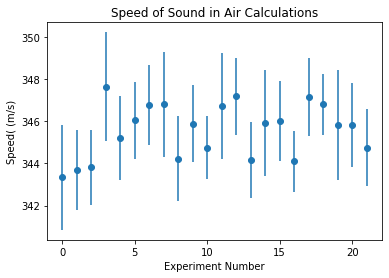

In [ ]:
plt.scatter(trail, v_a)
plt.errorbar(trail, v_a, yerr=v_a_unc, linestyle = '')

plt.title("Speed of Sound in Air Calculations")
plt.xlabel("Experiment Number")
plt.ylabel("Speed( (m/s)")
plt.show()

## Calculating a Weighted Average Value for $v_a$, the Speed of Sound in Air
To get a best value and uncertainty for the speed of sound in air we will use the typical method of weighting each value by their uncertainty as shown in the equation below:
 $$v_a = \frac{\sum_i\frac{v_a}{\sigma_{v_a}^2}}{\sum_i\frac{1}{\sigma_{v_a}^2}}$$
 With an uncertainty according to the following equation:
 $$\sigma_{v_a} = \left( \sqrt{\sum_i\frac{1}{\sigma_{v_a}^2}}\right)^{-1}$$

In [ ]:
v_a_weight = (np.sum(v_a/v_a_unc**2))/(np.sum(1/v_a_unc**2))
v_a_weight_unc = (np.sum(1/v_a_unc**2))**-.5

print(f"The weighted average value for the speed of sound in air is {round(v_a_weight, 1)}m/s.")
print(f"The uncertainty in this value is {round(v_a_weight_unc,1)}m/s.")

The weighted average value for the speed of sound in air is 345.5m/s.
The uncertainty in this value is 0.4m/s.


The weighted average value of the speed of sound in air is $$v_a= (345.5\pm0.4)\frac{m}{s}$$

## Calculating a Value for $v_a$ using the Spread Method

In [ ]:
v_a_spread = stats.mean(v_a)
v_a_spread_unc = stats.stdev(v_a) / np.sqrt(len(v_a))

print(f"The speed of sound in air calculated value using the spread method is {round(v_a_spread, 1)}m/s with an uncertainty in this value of {round(v_a_spread_unc, 1)}m/s.")

The speed of sound in air calculated value using the spread method is 345.6m/s with an uncertainty in this value of 0.3m/s.


The spread calculated value for the speed of sound in air is $$v_a= (345.6\pm0.3)\frac{m}{s}$$

# Comparing Sources of Error

In [ ]:
freq_error = stats.mean((2/(np.sqrt((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2))*freq_unc/v_a_unc)**2)
L_x_error = stats.mean((freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_x**2/L_x**3 * L_x_unc/v_a_unc)**2)
L_y_error = stats.mean((freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_y**2/L_y**3 * L_y_unc/v_a_unc)**2)
L_z_error = stats.mean((freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_z**2/L_z**3 * L_z_unc/v_a_unc)**2)


print(f"The average proportion of error from the frequency measurements was {round(freq_error, 2)}.")
print(f"The average proportion of error from the length measurements in the x direction was {round(L_x_error, 2)}.")
print(f"The average proportion of error from the length measurements in the y direction was {round(L_y_error, 2)}.")
print(f"The average proportion of error from the length measurements in the z direction was {round(L_z_error, 2)}.")

The average proportion of error from the frequency measurements was 0.6.
The average proportion of error from the length measurements in the x direction was 0.18.
The average proportion of error from the length measurements in the y direction was 0.18.
The average proportion of error from the length measurements in the z direction was 0.04.


# Calculating the Speed of Sound in Helium

In [ ]:
# Getting the data
box_dim_df = pd.read_csv(os.path.join(data_dir, "box_dimensions.csv"))
helium_nodes_df = pd.read_csv(os.path.join(data_dir, "helium_node_data.csv"))

# Merging the data sets on the box number so that each node data also has the corresponding dimensions
data = pd.merge(helium_nodes_df, box_dim_df, on="Box")

# Creating numpy arrays for each of the columns so that we can preform operations with them
freq = data.iloc[:,1].values
n_x = data.iloc[:,2].values
n_y = data.iloc[:,3].values
L_x = data.iloc[:,4].values * 10**-3 # converting to meters
L_y = data.iloc[:,5].values * 10**-3 # converting to meters
L_z = data.iloc[:,6].values * 10**-3 # converting to meters

trail = np.asarray([i for i in range(len(n_x))])

Once, again, we will assume that all the $n_z$ are 0 as there are clearly some cases where this was true. We will then increase $n_z$ by 1 for the values not around the cluster of values formed when $n_z=0$ as these values must be around the true value as there was certainty some cases where $n_z=0$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


[1005.71       1012.214      1010.52097734 1001.16       1006.22892821
  947.64971311 1002.694      1003.88799624 1014.951       998.94048219
 1008.764       952.7248128            inf 1705.984       996.70802499
 1005.642      1005.93536727 2275.008      1013.384      1010.70435657
 1012.044     ]


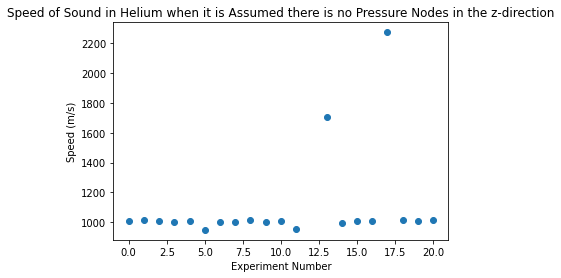

In [ ]:
n_z = [0 for i in range(len(n_y))]

v_h = 2*freq / ( np.sqrt((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2) )
print(v_h)

plt.scatter(trail, v_h)
plt.title("Speed of Sound in Helium when it is Assumed there is no Pressure Nodes in the z-direction")
plt.xlabel("Experiment Number")
plt.ylabel("Speed (m/s)")
plt.show()

[1005.71       1012.214      1010.52097734 1001.16       1006.22892821
  947.64971311 1002.694      1003.88799624 1014.951       998.94048219
 1008.764       952.7248128  1018.8        1010.60863027  996.70802499
 1005.642      1005.93536727 1005.39211958 1013.384      1010.70435657
 1012.044     ]


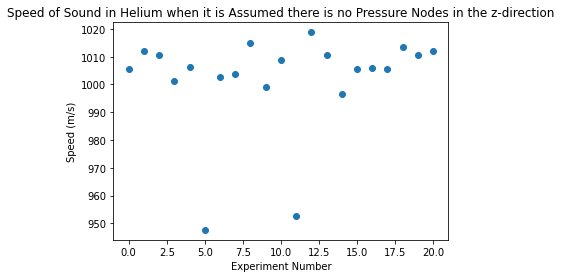

In [ ]:
# Correcting the n_z values which appear aroun 1000
for i in range(len(v_h)):
  if v_h[i] > 1100 or v_h[i]<900:
    n_z[i] += 1

# Recalculating values for speed of sound in air
v_h = 2*freq / ( np.sqrt((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2) )
print(v_h)

plt.scatter(trail, v_h)
plt.title("Speed of Sound in Helium when it is Assumed there is no Pressure Nodes in the z-direction")
plt.xlabel("Experiment Number")
plt.ylabel("Speed (m/s)")
plt.show()

### Solving for the Error in $v_h$, the Speed of Sound in Helium

In [ ]:
n_z = np.asarray(n_z)
freq_unc = np.asarray([9 for i in range(len(n_x))])
L_x_unc = np.asarray([0.001 for i in range(len(n_x))]) # in meters
L_y_unc = np.asarray([0.001 for i in range(len(n_x))]) # in meters
L_z_unc = np.asarray([0.001 for i in range(len(n_x))]) # in meters

v_h_unc = np.sqrt( (2/(np.sqrt((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2))*freq_unc)**2 + 
                   (freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_x**2/L_x**3 * L_x_unc)**2 + 
                   (freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_y**2/L_y**3 * L_y_unc)**2 +
                   (freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_z**2/L_z**3 * L_z_unc)**2 )

### Checking for Outliers
From the graph it appears the two lower values may be outliers. We will check using Cauvenet's Criterion. For a sample size of 24 Chauvenet's Criterion Table says any value with a z-score of more than 2.33 would be an outlier. 

In [ ]:
v_h_mean = stats.mean(v_h)
v_h_std = stats.stdev(v_h)
z_score = (v_h - v_h_mean) / v_h_std
print(z_score)

[ 0.1980157   0.55744907  0.46388683 -0.05343292  0.22669346 -3.01059511
  0.03134119  0.09732552  0.70870509 -0.1760911   0.36679023 -2.73012767
  0.92141405  0.46873083 -0.29946435  0.19425779  0.21047027  0.18044854
  0.62210729  0.474021    0.54805429]


It is clear that two of these values are outlier according to Chauvenet's Criterion and we will remove them. Explaining these outliers is discussed in the Conclusion Section. 

In [ ]:
# Removing outliers
if not len(v_h) ==22:
  j=0 # Allows us to have the right index as we delete trails
  for i in range(len(v_h)):
   if not -2.33 < z_score[i] < 2.33:
    v_h = np.delete(v_h, j)
    v_h_unc = np.delete(v_h_unc, j)
    freq = np.delete(freq, j)
    L_x = np.delete(L_x, j)
    L_y = np.delete(L_y, j)
    L_z = np.delete(L_z, j)
    freq_unc = np.delete(freq_unc, j)
    L_x_unc = np.delete(L_x_unc, j)
    L_y_unc = np.delete(L_y_unc, j)
    L_z_unc = np.delete(L_z_unc, j)
    n_x = np.delete(n_x, j)
    n_y = np.delete(n_y, j)
    n_z = np.delete(n_z, j)
   else:
    j+=1
    

# Relabeling trails
trail = np.asarray([i for i in range(len(v_h))])

### Graphing

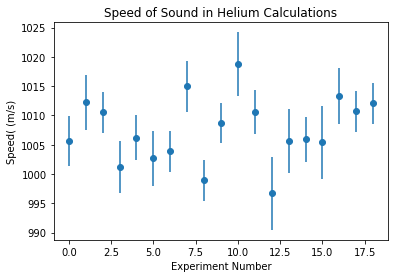

In [ ]:
plt.scatter(trail, v_h)
plt.errorbar(trail, v_h, yerr=v_h_unc, linestyle = '')

plt.title("Speed of Sound in Helium Calculations")
plt.xlabel("Experiment Number")
plt.ylabel("Speed( (m/s)")
plt.show()

## Calculating a Weighted Average Value for $v_h$, the Speed of Sound in Helium
To get a best value and uncertainty for the speed of sound in Helium we will use the typical method of weighting each value by their uncertainty as shown in the equation below:
 $$v_h = \frac{\sum_i\frac{v_h}{\sigma_{v_h}^2}}{\sum_i\frac{1}{\sigma_{v_h}^2}}$$
 With an uncertainty according to the following equation:
 $$\sigma_{v_a} = \left( \sqrt{\sum_i\frac{1}{\sigma_{v_h}^2}}\right)^{-1}$$

In [ ]:
v_h_weight = (np.sum(v_h/v_h_unc**2))/(np.sum(1/v_h_unc**2))
v_h_weight_unc = (np.sum(1/v_h_unc**2))**-.5

print(f"The weighted average value for the speed of sound in Helium is {round(v_h_weight, 1)}m/s.")
print(f"The uncertainty in this value is {round(v_h_weight_unc,1)}m/s.")

The weighted average value for the speed of sound in Helium is 1007.7m/s.
The uncertainty in this value is 0.9m/s.


The weighted average value of the speed of sound in Helium is $$v_h= (1007.7\pm0.9)\frac{m}{s}$$

## Calculating a Value for $v_h$ using the Spread Method

In [ ]:
v_h_spread = stats.mean(v_h)
v_h_spread_unc = stats.stdev(v_h) / np.sqrt(len(v_h))

print(f"The speed of sound in Helium calculated value using the spread method is {round(v_h_spread)}m/s with an uncertainty in this value of {round(v_h_spread_unc)}m/s.")

The speed of sound in Helium calculated value using the spread method is 1008m/s with an uncertainty in this value of 1m/s.


The weighted average value of the speed of sound in Helium is $$v_h= (1008\pm1)\frac{m}{s}$$

# Calculating Sources of Error

In [ ]:
freq_error = stats.mean((2/(np.sqrt((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2))*freq_unc/v_h_unc)**2)
L_x_error = stats.mean((freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_x**2/L_x**3 * L_x_unc/v_h_unc)**2)
L_y_error = stats.mean((freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_y**2/L_y**3 * L_y_unc/v_h_unc)**2)
L_z_error = stats.mean((freq/ ((n_x/L_x)**2 + (n_y/L_y)**2 + (n_z/L_z)**2)**(3/2) * n_z**2/L_z**3 * L_z_unc/v_h_unc)**2)


print(f"The average proportion of error from the frequency measurements was {round(freq_error, 2)}.")
print(f"The average proportion of error from the length measurements in the x direction was {round(L_x_error, 2)}.")
print(f"The average proportion of error from the length measurements in the y direction was {round(L_y_error, 2)}.")
print(f"The average proportion of error from the length measurements in the z direction was {round(L_z_error, 2)}.")

The average proportion of error from the frequency measurements was 0.18.
The average proportion of error from the length measurements in the x direction was 0.29.
The average proportion of error from the length measurements in the y direction was 0.39.
The average proportion of error from the length measurements in the z direction was 0.14.
